In [14]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

import os, pendulum

In [50]:
# apple_data파일 불러오기
file_path = './Data02/'
file_date = pendulum.now().to_date_string()
file_name = 'apple_data.csv'

df_rawdata_stock_apple = pd.read_csv(file_path+file_date+'_'+file_name)
df_rawdata_stock_apple.info()
df_rawdata_stock_apple.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     float64
 7   close_rtn  19 non-null     float64
 8   close_ma   19 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.5+ KB


,Date,Open,High,Low,Close,Adj Close,Volume,close_rtn,close_ma
15,2023-04-28,164.437370,165.925790,163.552632,165.045790,164.595553,5.103735e+07,0.065054,160.005286
16,2023-05-31,172.510456,173.752728,171.444545,172.622728,172.293533,5.796161e+07,0.045908,168.834259
17,2023-06-30,183.679048,185.438095,182.615714,184.283333,184.034816,6.176672e+07,0.067550,178.453030
18,2023-07-31,192.506500,193.927001,191.219499,192.411501,192.152022,4.980332e+07,0.044107,188.347417
19,2023-08-31,181.756669,182.787332,179.724335,180.784002,180.651289,6.017949e+07,-0.060430,186.597751


In [17]:
model = ARIMA(df_rawdata_stock_apple['Close'].values, order=(0,1,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -69.785
Date:                Tue, 22 Aug 2023   AIC                            145.570
Time:                        13:24:27   BIC                            148.403
Sample:                             0   HQIC                           146.049
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2307      0.362      0.637      0.524      -0.479       0.940
ma.L2         -0.1839      0.257     -0.716      0.474      -0.687       0.320
sigma2        90.0111     40.975      2.197      0.028       9.701     170.321
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.92   Prob(JB):                         0.77
Heteroskedasticity (H):               1.04   Skew:                            -0.32
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

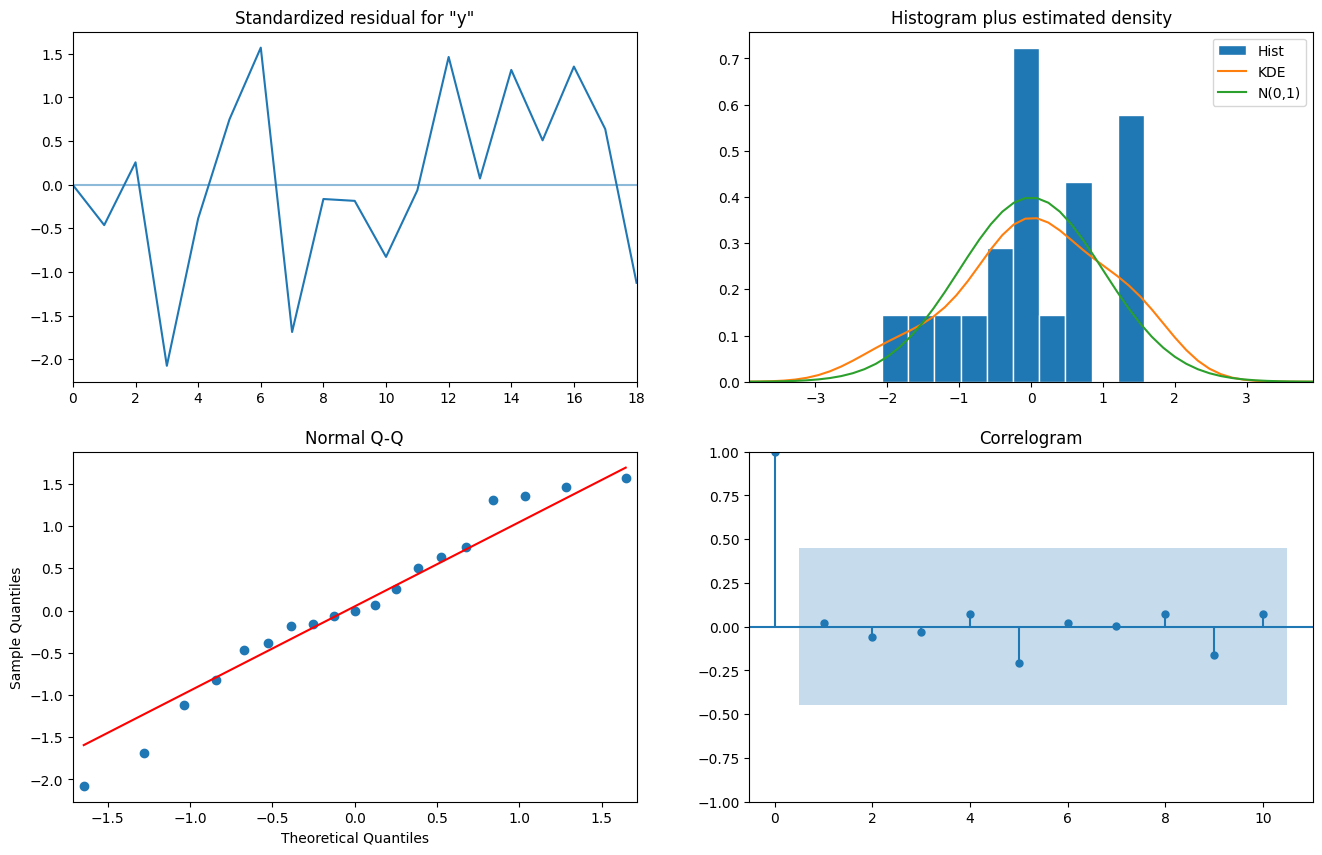

In [86]:
# 1. Standardized residuals over time
# 2. Histogram plus estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference.
# 3. Normal Q-Q plot, with Normal reference line.
# 4. Correlogram

model_fit.plot_diagnostics(figsize=(16,10))
plt.show()

In [117]:
pred = model_fit.get_prediction()
df_result_pred = pd.concat([pd.Series(pred.predicted_mean, name='predicted'), pd.DataFrame(pred.conf_int(), columns=['low', 'hight'])], axis=1)
df_result_pred01 = df_result_pred.iloc[1:, ].reset_index(drop=True)
df_result_pred01

,predicted,low,hight
0,169.864379,150.476871,189.251886
1,169.821234,150.726850,188.915619
2,164.374388,145.686837,183.061938
3,168.156861,149.523786,186.789935
4,143.474538,124.869494,162.079582
5,142.565395,123.966930,161.163860
6,151.983762,133.387739,170.579786
7,169.016613,150.421281,187.611945
8,146.568165,127.973063,165.163268
9,147.599259,129.004226,166.194292


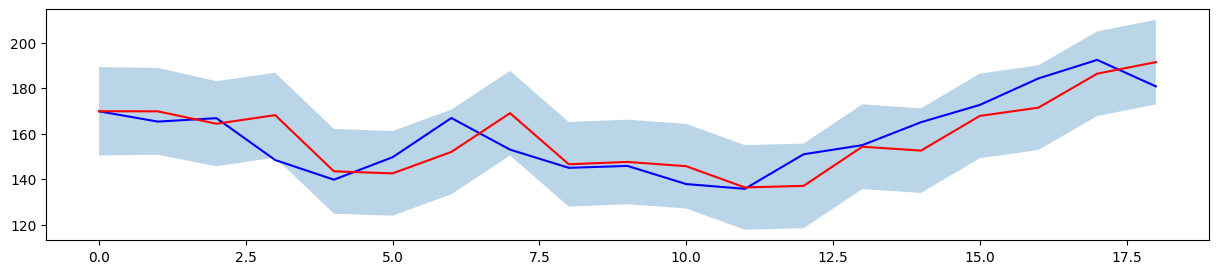

In [121]:
df_mod00_stock_apple = df_rawdata_stock_apple.iloc[1:,:].reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(15,3)

ax.plot(df_mod00_stock_apple.index, df_mod00_stock_apple.Close, color='b')
ax.plot(df_result_pred01.index, df_result_pred01.iloc[:, 0], color='r')
ax.fill_between(df_result_pred01.index, df_result_pred01.iloc[:,1], df_result_pred01.iloc[:,2], alpha=.3, linewidth=0)

plt.show()

In [122]:
pred = model_fit.get_forecast(steps=10)
df_result_forecast = pd.concat([pd.Series(pred.predicted_mean, name='predicted'), pd.DataFrame(pred.conf_int(), columns=['low', 'hight'])], axis=1)
df_result_forecast

,predicted,low,hight
0,177.210885,158.615885,195.805886
1,179.171589,149.683832,208.659346
2,179.171589,143.838018,214.505159
3,179.171589,138.830610,219.512568
4,179.171589,134.379536,223.963641
5,179.171589,130.332451,228.010726
6,179.171589,126.595979,231.747198
7,179.171589,123.107981,235.235197
8,179.171589,119.824630,238.518547
9,179.171589,116.713644,241.629534


In [123]:
df_total_result = pd.concat([df_result_pred01, df_result_forecast], axis=0).reset_index(drop=True)
df_total_result

,predicted,low,hight
0,169.864379,150.476871,189.251886
1,169.821234,150.726850,188.915619
2,164.374388,145.686837,183.061938
3,168.156861,149.523786,186.789935
4,143.474538,124.869494,162.079582
5,142.565395,123.966930,161.163860
6,151.983762,133.387739,170.579786
7,169.016613,150.421281,187.611945
8,146.568165,127.973063,165.163268
9,147.599259,129.004226,166.194292


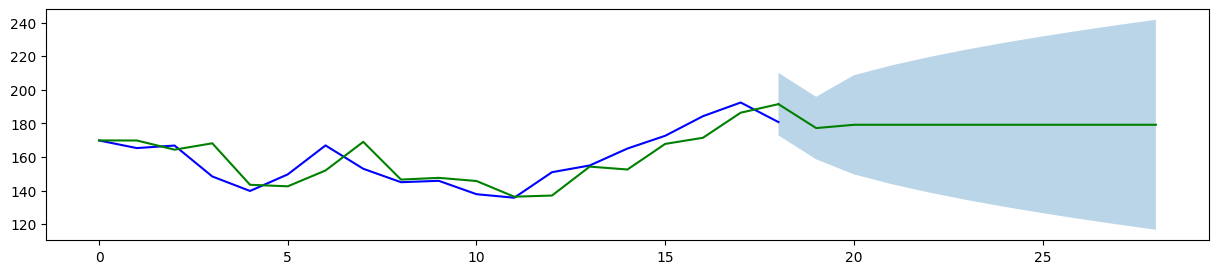

In [127]:
df_mod00_stock_apple = df_rawdata_stock_apple.iloc[1:,:].reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(15,3)

ax.plot(df_mod00_stock_apple.index, df_mod00_stock_apple.Close, color='b')
ax.plot(df_total_result.index[:19], df_total_result.iloc[:19, 0], color='g')
ax.plot(df_total_result.index[18:], df_total_result.iloc[18:, 0], color='g')
ax.fill_between(df_total_result.index[18:], df_total_result.iloc[18:,1], df_total_result.iloc[18:,2], alpha=.3, linewidth=0)

plt.show()